## **CASE 1: Mutually Disjoint Queries**

In [4]:
# Step 1 queries (QH)
QH = {
    "q1": (2000, 3000, 5, 10),
    "q2": (3500, 4500, 12, 15),
    "q3": (5000, 6000, 16, 18),
    "q4": (7000, 8000, 20, 23)
}

# Delta for extension
delta_acctbal = 100
delta_nationkey = 2

# Step 2: Generate QF* with disjoint extensions
QF_star = {}
for qid, (ab_l, ab_u, nk_l, nk_u) in QH.items():
    ext_ab_l = ab_l - delta_acctbal
    ext_ab_u = ab_u + delta_acctbal
    ext_nk_l = max(0, nk_l - delta_nationkey)
    ext_nk_u = min(24, nk_u + delta_nationkey)
    QF_star[qid] = (ext_ab_l, ext_ab_u, ext_nk_l, ext_nk_u)

# Format into a DataFrame for display
import pandas as pd


df_qf_star = pd.DataFrame.from_dict(QF_star, orient='index', columns=[
    'acctbal_lower', 'acctbal_upper', 'nationkey_lower', 'nationkey_upper'
])
# tools.display_dataframe_to_user(name="Mutually Disjoint QF* Queries (Extended)", dataframe=df_qf_star)
print(df_qf_star)


    acctbal_lower  acctbal_upper  nationkey_lower  nationkey_upper
q1           1900           3100                3               12
q2           3400           4600               10               17
q3           4900           6100               14               20
q4           6900           8100               18               24


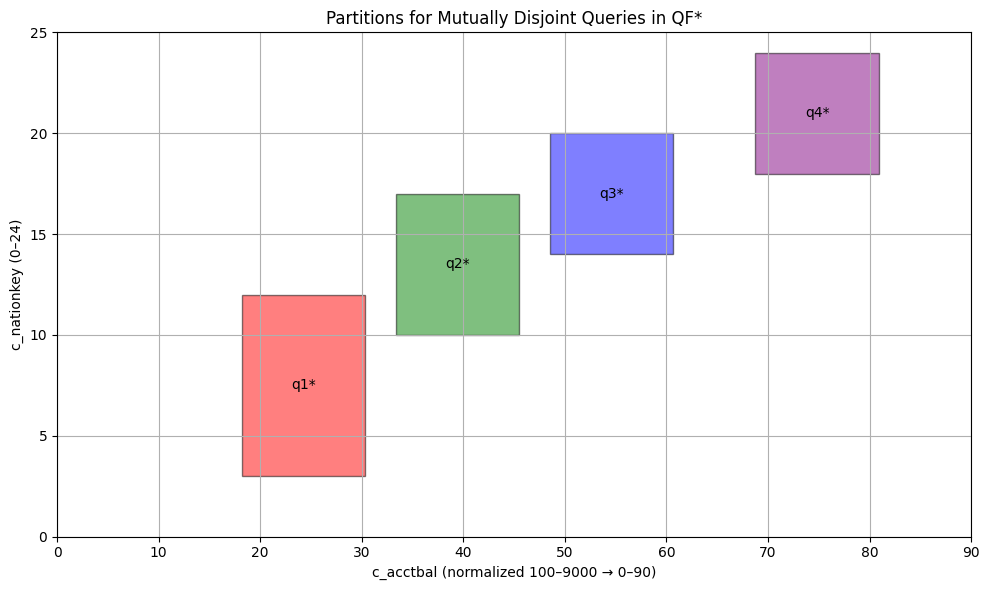

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Normalize acctbal to [0, 90] for x-axis
def normalize_acctbal(val):
    return (val - 100) * (90 / (9000 - 100))

# Define query regions using QF*
QF_star_plot = {
    "q1*": {
        "x": normalize_acctbal(1900),
        "width": normalize_acctbal(3100) - normalize_acctbal(1900),
        "y": 3,
        "height": 12 - 3,
        "color": "red"
    },
    "q2*": {
        "x": normalize_acctbal(3400),
        "width": normalize_acctbal(4600) - normalize_acctbal(3400),
        "y": 10,
        "height": 17 - 10,
        "color": "green"
    },
    "q3*": {
        "x": normalize_acctbal(4900),
        "width": normalize_acctbal(6100) - normalize_acctbal(4900),
        "y": 14,
        "height": 20 - 14,
        "color": "blue"
    },
    "q4*": {
        "x": normalize_acctbal(6900),
        "width": normalize_acctbal(8100) - normalize_acctbal(6900),
        "y": 18,
        "height": 24 - 18,
        "color": "purple"
    }
}

# Plot the bar-style rectangle partitions
fig, ax = plt.subplots(figsize=(10, 6))
for qid, props in QF_star_plot.items():
    rect = patches.Rectangle((props["x"], props["y"]), props["width"], props["height"],
                             edgecolor='black', facecolor=props["color"], alpha=0.5, label=qid)
    ax.add_patch(rect)
    ax.text(props["x"] + props["width"] / 2, props["y"] + props["height"] / 2,
            qid, color='black', ha='center', va='center', fontsize=10)

# Plot formatting
ax.set_xlim(0, 90)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal (normalized 100–9000 → 0–90)")
ax.set_ylabel("c_nationkey (0–24)")
ax.set_title("Partitions for Mutually Disjoint Queries in QF*")
plt.grid(True)
plt.tight_layout()

# # Save and display
# output_path = "/mnt/data/Partitions_QFstar_BarGraph.png"
# plt.savefig(output_path)
plt.show()


In [5]:
# Step 1: Define Historical Queries QH using (acctbal_low, acctbal_high, nationkey_low, nationkey_high)
QH = {
    "q1": (1000, 1100, 5, 7),
    "q2": (3000, 3100, 12, 14),
    "q3": (6000, 6100, 20, 22),
    "q4": (1050, 1150, 6, 8),
    "q5": (1075, 1175, 7, 9),
    "q6": (3050, 3150, 13, 15),
    "q7": (3075, 3175, 14, 16),
}

# Step 2: Extend QH to form QF* using delta values
delta_acctbal = 100
delta_nationkey = 2

QF_star = {}
for qid, (acc_l, acc_u, nat_l, nat_u) in QH.items():
    extended_acc_l = acc_l - delta_acctbal
    extended_acc_u = acc_u + delta_acctbal
    extended_nat_l = nat_l - delta_nationkey
    extended_nat_u = nat_u + delta_nationkey
    QF_star[qid] = (extended_acc_l, extended_acc_u, extended_nat_l, extended_nat_u)

import pandas as pd
qf_df = pd.DataFrame([
    {
        "Query": qid,
        "AcctBal Range": f"[{v[0]}, {v[1]}]",
        "NationKey Range": f"[{v[2]}, {v[3]}]"
    } for qid, v in QF_star.items()
])

# import ace_tools as tools; tools.display_dataframe_to_user(name="Extended Queries QF*", dataframe=qf_df)
print(qf_df)


  Query AcctBal Range NationKey Range
0    q1   [900, 1200]          [3, 9]
1    q2  [2900, 3200]        [10, 16]
2    q3  [5900, 6200]        [18, 24]
3    q4   [950, 1250]         [4, 10]
4    q5   [975, 1275]         [5, 11]
5    q6  [2950, 3250]        [11, 17]
6    q7  [2975, 3275]        [12, 18]


## **CASE 2: Intersecting Queries**


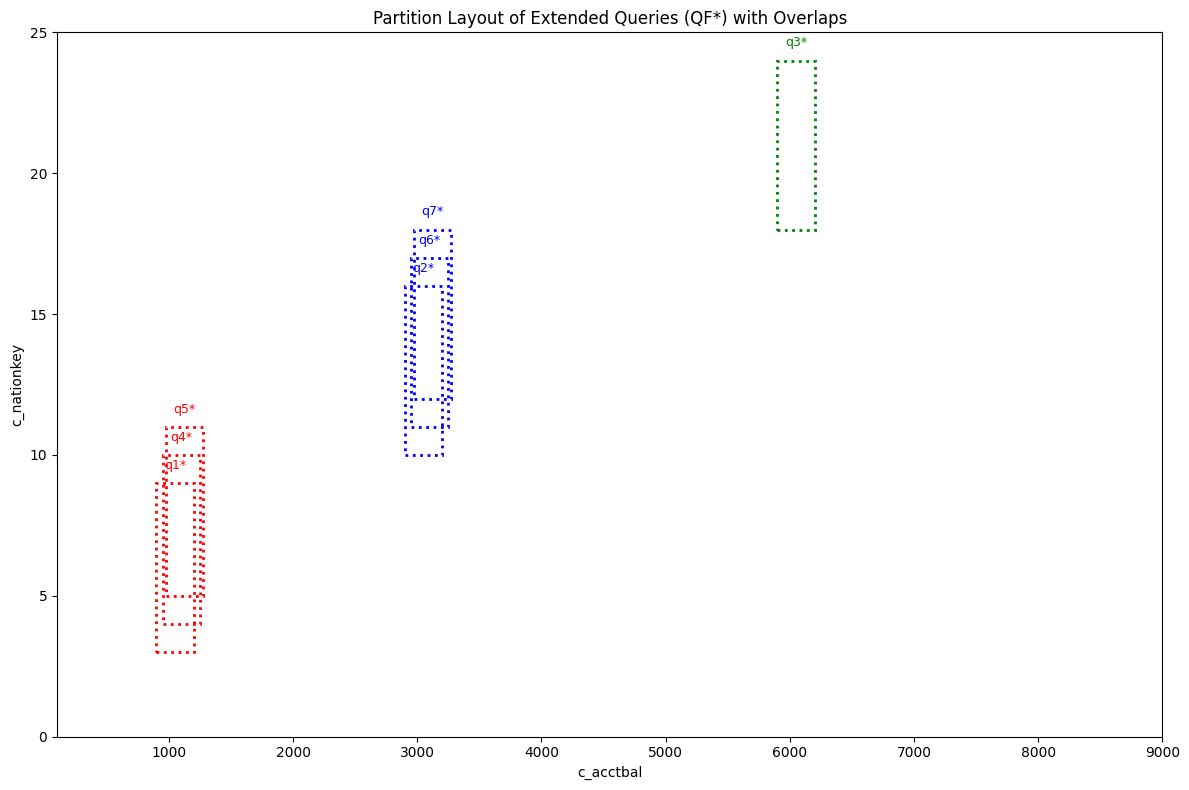

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define extended queries QF* visually using the same coordinates from the table
# Format: (x_start, y_start, width, height)
visual_boxes = {
    "q1": {"x": 900, "y": 3, "w": 300, "h": 6},
    "q4": {"x": 950, "y": 4, "w": 300, "h": 6},
    "q5": {"x": 975, "y": 5, "w": 300, "h": 6},
    "q2": {"x": 2900, "y": 10, "w": 300, "h": 6},
    "q6": {"x": 2950, "y": 11, "w": 300, "h": 6},
    "q7": {"x": 2975, "y": 12, "w": 300, "h": 6},
    "q3": {"x": 5900, "y": 18, "w": 300, "h": 6},
}

# Draw extended queries as dotted rectangles
colors = {
    "q1": "red", "q4": "red", "q5": "red",
    "q2": "blue", "q6": "blue", "q7": "blue",
    "q3": "green"
}

for qid, box in visual_boxes.items():
    rect = patches.Rectangle((box["x"], box["y"]), box["w"], box["h"],
                             linewidth=2, edgecolor=colors[qid], linestyle='dotted', facecolor='none')
    ax.add_patch(rect)
    ax.text(box["x"] + box["w"]/2, box["y"] + box["h"] + 0.5, f"{qid}*", ha='center', fontsize=9, color=colors[qid])

# Format axes
ax.set_xlim(100, 9000)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal")
ax.set_ylabel("c_nationkey")
ax.set_title("Partition Layout of Extended Queries (QF*) with Overlaps")

plt.grid(False)
plt.tight_layout()
plt.show()


## **Minimum Bounding Rectangle**

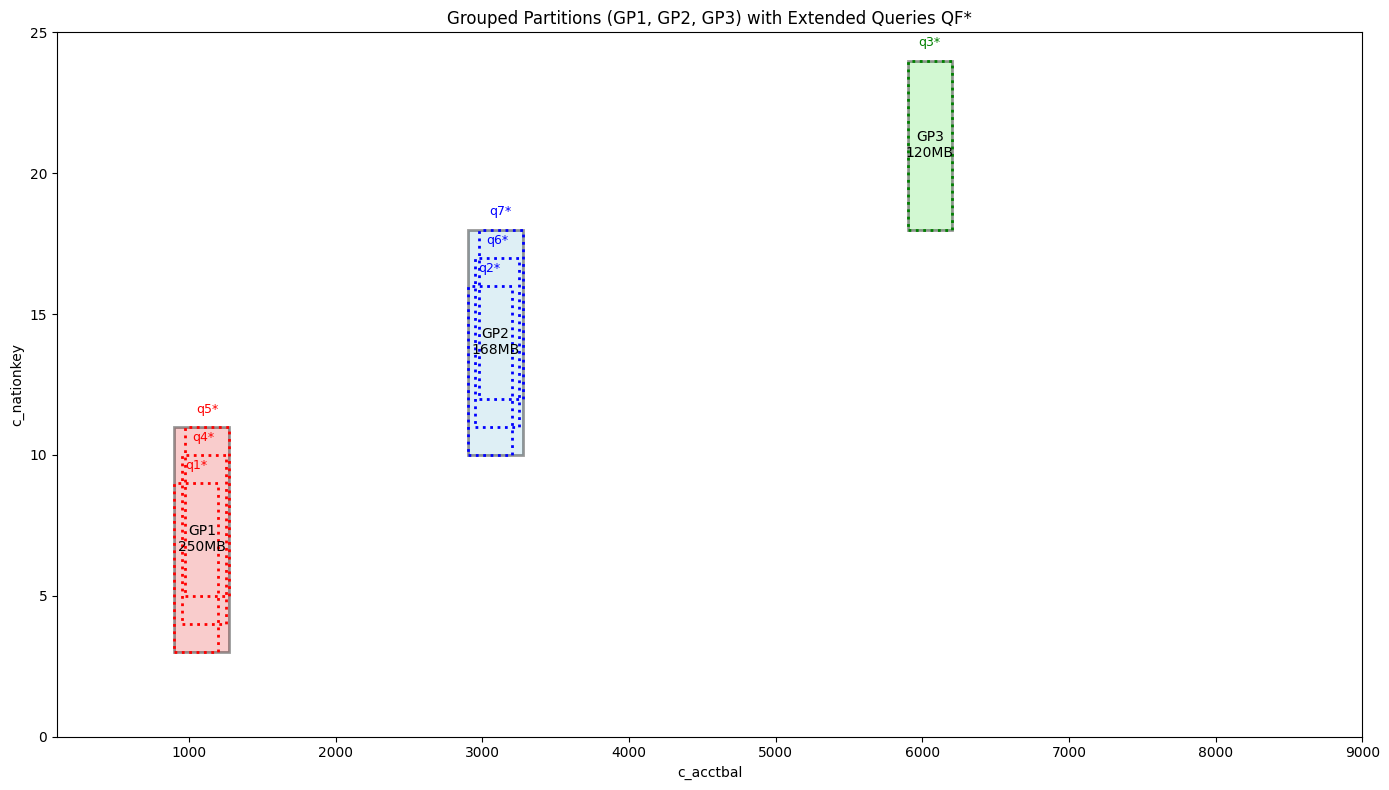

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define grouped partitions using the bounding boxes of intersecting queries
grouped_partitions = {
    "GP1": {"x": 900, "y": 3, "width": 375, "height": 8, "color": "lightcoral", "size": "250MB"},
    "GP2": {"x": 2900, "y": 10, "width": 375, "height": 8, "color": "lightblue", "size": "168MB"},
    "GP3": {"x": 5900, "y": 18, "width": 300, "height": 6, "color": "lightgreen", "size": "120MB"},
}

# Extended queries (QF*) for overlay
QF_star_boxes = {
    "q1": {"x": 900, "y": 3, "w": 300, "h": 6},
    "q4": {"x": 950, "y": 4, "w": 300, "h": 6},
    "q5": {"x": 975, "y": 5, "w": 300, "h": 6},
    "q2": {"x": 2900, "y": 10, "w": 300, "h": 6},
    "q6": {"x": 2950, "y": 11, "w": 300, "h": 6},
    "q7": {"x": 2975, "y": 12, "w": 300, "h": 6},
    "q3": {"x": 5900, "y": 18, "w": 300, "h": 6},
}

query_colors = {
    "q1": "red", "q4": "red", "q5": "red",
    "q2": "blue", "q6": "blue", "q7": "blue",
    "q3": "green"
}

# Plot setup
fig, ax = plt.subplots(figsize=(14, 8))

# Draw grouped partitions
for gid, g in grouped_partitions.items():
    rect = patches.Rectangle((g["x"], g["y"]), g["width"], g["height"],
                             linewidth=2, edgecolor='black', facecolor=g["color"], alpha=0.4)
    ax.add_patch(rect)
    ax.text(g["x"] + g["width"] / 2, g["y"] + g["height"] / 2, f"{gid}\n{g['size']}",
            fontsize=10, ha='center', va='center')

# Draw QF* queries
for qid, q in QF_star_boxes.items():
    rect = patches.Rectangle((q["x"], q["y"]), q["w"], q["h"],
                             linewidth=2, edgecolor=query_colors[qid], linestyle='dotted', facecolor='none')
    ax.add_patch(rect)
    ax.text(q["x"] + q["w"] / 2, q["y"] + q["h"] + 0.5, f"{qid}*", ha='center', fontsize=9, color=query_colors[qid])

# Final formatting
ax.set_xlim(100, 9000)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal")
ax.set_ylabel("c_nationkey")
ax.set_title("Grouped Partitions (GP1, GP2, GP3) with Extended Queries QF*")

plt.grid(False)
plt.tight_layout()
plt.show()


## **Expanding the partition**

In [14]:
# Re-import necessary modules due to kernel reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset (Po)
np.random.seed(42)

# Let's assume 1000 records, uniformly distributed around and beyond GP3
po_records = pd.DataFrame({
    'c_acctbal': np.random.randint(5000, 7000, 1000),
    'c_nationkey': np.random.randint(0, 25, 1000)
})

# Define original GP3 bounds
gp3_bounds = {
    'c_acctbal': (5900, 6200),
    'c_nationkey': (18, 24)
}

# Step 2: Compute center and radius of GP3
gp3_center = {
    'c_acctbal': (gp3_bounds['c_acctbal'][0] + gp3_bounds['c_acctbal'][1]) / 2,
    'c_nationkey': (gp3_bounds['c_nationkey'][0] + gp3_bounds['c_nationkey'][1]) / 2
}

gp3_radius = {
    'c_acctbal': (gp3_bounds['c_acctbal'][1] - gp3_bounds['c_acctbal'][0]) / 2,
    'c_nationkey': (gp3_bounds['c_nationkey'][1] - gp3_bounds['c_nationkey'][0]) / 2
}

# Step 3: Compute F_GP(x) for each record in Po
def compute_fgp(row, center, radius):
    d1 = abs(row['c_acctbal'] - center['c_acctbal']) / radius['c_acctbal']
    d2 = abs(row['c_nationkey'] - center['c_nationkey']) / radius['c_nationkey']
    return max(d1, d2)

po_records['F_GP'] = po_records.apply(compute_fgp, axis=1, center=gp3_center, radius=gp3_radius)

# Step 4: Sort records by F_GP and select until size ≥ bmin (assume 1 record ≈ 1MB for simplicity)
bmin = 128  # MB
po_records_sorted = po_records.sort_values(by='F_GP').reset_index(drop=True)
selected_gp3_records = po_records_sorted.iloc[:bmin]

# # Display records included in the new expanded GP3
# import ace_tools as tools; tools.display_dataframe_to_user(name="Expanded GP3 Records", dataframe=selected_gp3_records)
print(selected_gp3_records)

# Return current f (for visualization: largest F_GP among included records)
max_f_used = selected_gp3_records['F_GP'].max()
max_f_used


     c_acctbal  c_nationkey      F_GP
0         6072           21  0.146667
1         6097           21  0.313333
2         6044           22  0.333333
3         6015           20  0.333333
4         6003           22  0.333333
..         ...          ...       ...
123       6149           15  2.000000
124       5750           23  2.000000
125       6253           15  2.000000
126       6168           15  2.000000
127       6012           15  2.000000

[128 rows x 3 columns]


np.float64(2.0)

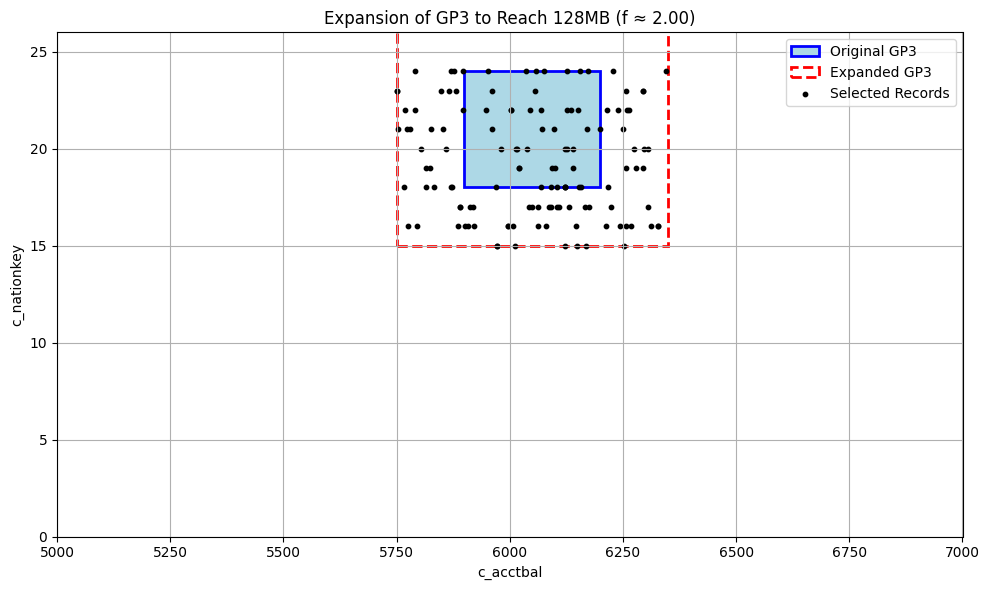

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Step 1: Generate synthetic dataset Po of 1000 records
np.random.seed(42)
num_records = 1000
po_df = pd.DataFrame({
    "c_acctbal": np.random.randint(5000, 7001, size=num_records),
    "c_nationkey": np.random.randint(0, 25, size=num_records)
})

# Step 2: Define GP3 original bounds and compute center and radius
gp3_bounds = {
    "c_acctbal": (5900, 6200),
    "c_nationkey": (18, 24)
}
center = {
    k: (v[0] + v[1]) / 2 for k, v in gp3_bounds.items()
}
radius = {
    k: (v[1] - v[0]) / 2 for k, v in gp3_bounds.items()
}

# Step 3: Compute F_GP(x) for each record
def compute_fgp(row, center, radius):
    return max(abs(row["c_acctbal"] - center["c_acctbal"]) / radius["c_acctbal"],
               abs(row["c_nationkey"] - center["c_nationkey"]) / radius["c_nationkey"])

po_df["F_GP"] = po_df.apply(lambda row: compute_fgp(row, center, radius), axis=1)

# Step 4: Sort by F_GP and accumulate until size >= 128MB
record_size_mb = 1  # Assume 1MB per record for simplicity
sorted_po = po_df.sort_values(by="F_GP")
cumulative_size = 0
selected_records = []

for i, row in sorted_po.iterrows():
    selected_records.append(row)
    cumulative_size += record_size_mb
    if cumulative_size >= 128:
        break

selected_df = pd.DataFrame(selected_records)
f_expansion = selected_df["F_GP"].max()

# Step 5: Expand the region
expanded_bounds = {
    k: (
        center[k] - f_expansion * radius[k],
        center[k] + f_expansion * radius[k]
    ) for k in center
}

# Step 6: Plot original and expanded GP3
fig, ax = plt.subplots(figsize=(10, 6))

# Original GP3
orig_x = gp3_bounds["c_acctbal"][0]
orig_y = gp3_bounds["c_nationkey"][0]
orig_w = gp3_bounds["c_acctbal"][1] - gp3_bounds["c_acctbal"][0]
orig_h = gp3_bounds["c_nationkey"][1] - gp3_bounds["c_nationkey"][0]
ax.add_patch(patches.Rectangle((orig_x, orig_y), orig_w, orig_h,
                               linewidth=2, edgecolor='blue', facecolor='lightblue', label="Original GP3"))

# Expanded GP3
exp_x = expanded_bounds["c_acctbal"][0]
exp_y = expanded_bounds["c_nationkey"][0]
exp_w = expanded_bounds["c_acctbal"][1] - expanded_bounds["c_acctbal"][0]
exp_h = expanded_bounds["c_nationkey"][1] - expanded_bounds["c_nationkey"][0]
ax.add_patch(patches.Rectangle((exp_x, exp_y), exp_w, exp_h,
                               linewidth=2, edgecolor='red', facecolor='none', linestyle='--', label="Expanded GP3"))

# Plot selected records
ax.scatter(selected_df["c_acctbal"], selected_df["c_nationkey"], color='black', s=10, label="Selected Records")

# Formatting
ax.set_xlim(5000, 7000)
ax.set_ylim(0, 26)
ax.set_xlabel("c_acctbal")
ax.set_ylabel("c_nationkey")
ax.set_title(f"Expansion of GP3 to Reach 128MB (f ≈ {f_expansion:.2f})")
ax.legend()
plt.grid(True)
plt.tight_layout()
# plt.show()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Expanded GP3 Records", dataframe=selected_df[["c_acctbal", "c_nationkey", "F_GP"]])


### **THE FINAL EXPANSION**

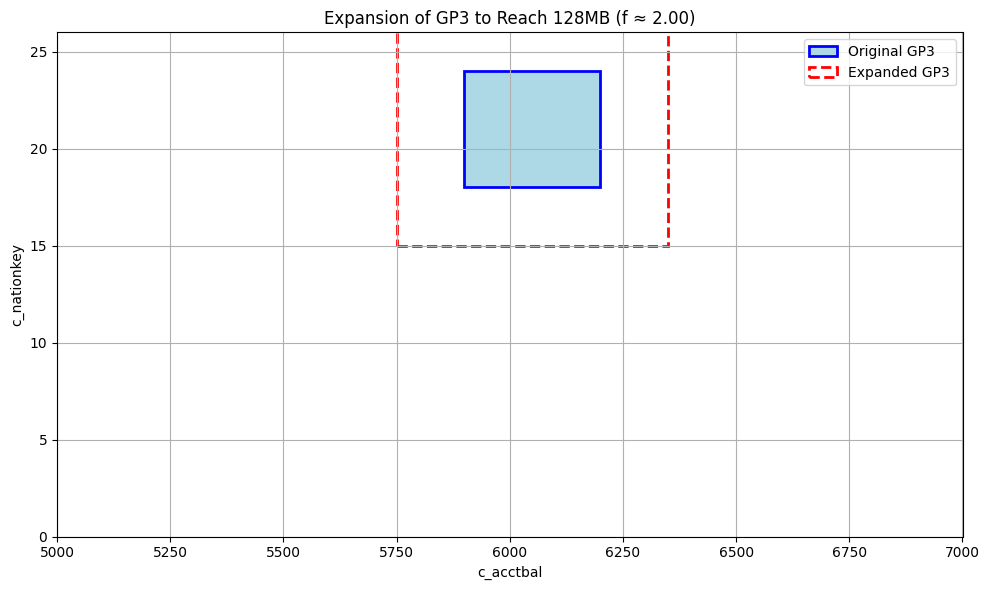

{'Left (min c_acctbal)': np.float64(5750.0),
 'Right (max c_acctbal)': np.float64(6350.0),
 'Bottom (min c_nationkey)': np.float64(15.0),
 'Top (max c_nationkey)': np.float64(27.0)}

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 6: Plot original and expanded GP3 without showing selected records
fig, ax = plt.subplots(figsize=(10, 6))

# Original GP3
orig_x = gp3_bounds["c_acctbal"][0]
orig_y = gp3_bounds["c_nationkey"][0]
orig_w = gp3_bounds["c_acctbal"][1] - gp3_bounds["c_acctbal"][0]
orig_h = gp3_bounds["c_nationkey"][1] - gp3_bounds["c_nationkey"][0]
ax.add_patch(patches.Rectangle((orig_x, orig_y), orig_w, orig_h,
                               linewidth=2, edgecolor='blue', facecolor='lightblue', label="Original GP3"))

# Expanded GP3
exp_x = expanded_bounds["c_acctbal"][0]
exp_y = expanded_bounds["c_nationkey"][0]
exp_w = expanded_bounds["c_acctbal"][1] - expanded_bounds["c_acctbal"][0]
exp_h = expanded_bounds["c_nationkey"][1] - expanded_bounds["c_nationkey"][0]
ax.add_patch(patches.Rectangle((exp_x, exp_y), exp_w, exp_h,
                               linewidth=2, edgecolor='red', facecolor='none', linestyle='--', label="Expanded GP3"))

# Formatting
ax.set_xlim(5000, 7000)
ax.set_ylim(0, 26)
ax.set_xlabel("c_acctbal")
ax.set_ylabel("c_nationkey")
ax.set_title(f"Expansion of GP3 to Reach 128MB (f ≈ {f_expansion:.2f})")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return the extended region bounds for output
expanded_bounds_output = {
    "Left (min c_acctbal)": expanded_bounds["c_acctbal"][0],
    "Right (max c_acctbal)": expanded_bounds["c_acctbal"][1],
    "Bottom (min c_nationkey)": expanded_bounds["c_nationkey"][0],
    "Top (max c_nationkey)": expanded_bounds["c_nationkey"][1],
}

expanded_bounds_output
